In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%pylab inline
#import seaborn as sns
from bokeh.core.properties import value
from bokeh.io import show, output_notebook
from bokeh.plotting import *
from bokeh.models import ColumnDataSource, FactorRange, Legend
from bokeh.palettes import Spectral6, Spectral8, Category20, Spectral3
from bokeh.transform import factor_cmap

output_notebook()

cust = pd.read_csv('custodial-deaths.csv')
shoot = pd.read_csv('officer_shootings.csv')

Populating the interactive namespace from numpy and matplotlib


C:\Users\Lara\Miniconda3\lib\site-packages\IPython\core\magics\pylab.py:160: UserWarning: pylab import has clobbered these variables: ['source', 'GridSpec', 'save', 'legend', 'Figure', 'show', 'f', 'figure']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


Loading BokehJS ...

In [2]:
cust.head()

,Department Name,Custody Type,Custody Type Facility,First Name,Middle Name,Last Name,Ethnicity,Sex,Age,Death Date,Manner Death,Charges Status,Summary,Unnamed: 13
0,Texas Department Of Criminal Justice,Penitentiary,Pack,A.,NaN,Gomez,Hispanic or Latino,Male,58.0,9/12/2012 0:00,Natural Causes/Illness,Convicted,NaN,NaN
1,Texas Department Of Criminal Justice,Penitentiary,Michael Unit,A.,D.,Randle,Black or African American,Male,76.0,9/29/2016 0:00,Natural Causes/Illness,Convicted,Offender Randle passed away while in attendanc...,NaN
2,Harlingen Police Dept.,Municipal Jail,0,Aaron,Omar,Cavazos,Hispanic or Latino,Male,30.0,12/14/2016 0:00,Other,Not filed at time of death,Officers responded to the decedent's residence...,NaN
3,Texas Department Of Criminal Justice,Penitentiary,Garza West,Aaron,NaN,Cramer,Anglo or White,Male,39.0,11/6/2011 0:00,Accidental injury to self,Convicted,Offender Aaron Cramer suffered a seizure and w...,NaN
4,Texas Department Of Criminal Justice,Penitentiary,Hospital Galveston,Aaron,NaN,Daffern,Anglo or White,Male,31.0,12/8/2014 0:00,Natural Causes/Illness,Convicted,"On December 2, 2014, Offender Daffern was admi...",NaN


In [3]:
#add column of years extracted "Death Date"
cust['year'] = pd.DatetimeIndex(cust['Death Date']).year

In [71]:
#Forward fill state abbreviation manually added to csv
shoot['state'] = shoot['state'].ffill()

In [72]:
#restrict Shooting df to only Texas departments
shoot = shoot[shoot.state == 'TX']

In [6]:
#create list of Manner of Death types
deathtype= list(cust['Manner Death'].unique())

In [7]:
#create list of Ethnicity types
eth = list(cust['Ethnicity'].unique())

Text(0,0.5,'Number of Deaths from 2005-2016')

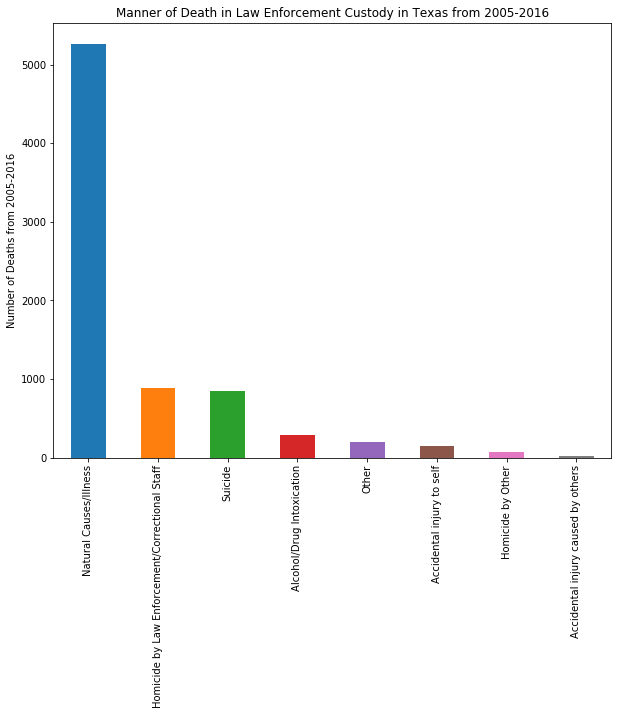

In [8]:
#bar graph of total deaths, broken sown by Manner of Death
cust['Manner Death'].value_counts().plot(kind ='bar',figsize=(10,8), title = 'Manner of Death in Law Enforcement Custody in Texas from 2005-2016')
plt.ylabel('Number of Deaths from 2005-2016')

In [9]:
#Horizontal bar graph (using Bokeh) of the numbers of occurances of each Manner of Death
counts = cust['Manner Death'].value_counts()

source = ColumnDataSource(data=dict(deathtype=deathtype, counts=counts))

p = figure(y_range=deathtype, plot_height=500, plot_width=900, title="Manner of Death in Custody from 2005-2016",x_axis_label='Number of Deaths from 2005-2016',
           toolbar_location=None, tools="")

p.hbar(y='deathtype', right='counts', height=0.5, color='color', legend="deathtype", source=source, 
       line_color='white', fill_color=factor_cmap('deathtype', palette=Spectral8, factors=deathtype))

factor_cmap('deathtype', palette=Spectral6, factors=deathtype)

p.xgrid.grid_line_color = None
p.x_range.start = 0
p.x_range.end = 6000
p.legend.orientation = "vertical"
p.legend.location = "top_right"

show(p)

C:\Users\Lara\Miniconda3\lib\site-packages\bokeh\models\mappers.py:82: UserWarning: Palette length does not match number of factors. ['Homicide by Other', 'Accidental injury caused by others'] will be assigned to `nan_color` gray
  warnings.warn("Palette length does not match number of factors. %s will be assigned to `nan_color` %s" % (extra_factors, self.nan_color))


In [10]:
#Bar graph showing the Ethnicity of each death in custody
counts = cust['Ethnicity'].value_counts()

source = ColumnDataSource(data=dict(eth=eth, counts=counts))

t = figure(y_range=eth, plot_height=500, plot_width=900, title="Ethnicity of Deaths in Custody",x_axis_label='Number of Deaths from 2005-2016',
           toolbar_location=None, tools="")

t.hbar(y='eth', right='counts', height=0.5, color='color', legend="eth", source=source, 
       line_color='white', fill_color=factor_cmap('eth', palette=Spectral8, factors=eth))

factor_cmap('deathtype', palette=Spectral6, factors=deathtype)

t.xgrid.grid_line_color = None
t.x_range.start = 0
t.x_range.end = 4000
t.legend.orientation = "vertical"
t.legend.location = "top_right"

show(t)

C:\Users\Lara\Miniconda3\lib\site-packages\bokeh\models\mappers.py:82: UserWarning: Palette length does not match number of factors. ['Homicide by Other', 'Accidental injury caused by others'] will be assigned to `nan_color` gray
  warnings.warn("Palette length does not match number of factors. %s will be assigned to `nan_color` %s" % (extra_factors, self.nan_color))


In [11]:
#create binary/contingency tables for four variables
race = cust['Ethnicity'].dropna()
death = cust['Manner Death'].dropna()
charge = cust['Charges Status'].dropna()

#dfcharge = pd.get_dummies(custody)
dfrace =pd.get_dummies(race)
dfdeath = pd.get_dummies(death)
dfcharge = pd.get_dummies(charge)

In [12]:
dfcharge.tail()

,Convicted,Filed,Not filed at time of death,Probation/Parole
7724,0,0,1,0
7725,1,0,0,0
7726,0,0,1,0
7727,0,0,1,0
7728,1,0,0,0


In [13]:
#Attempt to measure correlation between Manner of Death types and Ethnicity
dfdeath.corrwith(dfrace)

Accidental injury caused by others               NaN
Accidental injury to self                        NaN
Alcohol/Drug Intoxication                        NaN
American Indian/Alaska Native                    NaN
Anglo or White                                   NaN
Asian                                            NaN
Black or African American                        NaN
Hispanic or Latino                               NaN
Homicide by Law Enforcement/Correctional Staff   NaN
Homicide by Other                                NaN
Middle East                                      NaN
Native Hawaiian/Pacific Islander                 NaN
Natural Causes/Illness                           NaN
Other                                            NaN
Other/Don't Know                                 NaN
Suicide                                          NaN
dtype: float64

In [14]:
#create small df counting deaths grouped by Cause and Ethnicity
breakdown = cust.groupby(['Ethnicity', 'Manner Death'])['Last Name'].count()
death_eth_df = breakdown.unstack()
death_eth_df = death_eth_df.fillna(0).astype(int)

In [15]:
death_eth_df

Manner Death,Accidental injury caused by others,Accidental injury to self,Alcohol/Drug Intoxication,Homicide by Law Enforcement/Correctional Staff,Homicide by Other,Natural Causes/Illness,Other,Suicide
Ethnicity,,,,,,,,
American Indian/Alaska Native,0,0,0,5,0,5,1,2
Anglo or White,3,63,99,321,25,2183,77,455
Asian,0,0,3,5,1,19,0,6
Black or African American,6,36,93,213,22,1687,68,147
Hispanic or Latino,11,54,88,291,24,1363,56,229
Middle East,0,1,0,7,0,2,0,2
Native Hawaiian/Pacific Islander,1,0,1,1,0,1,0,1
Other/Don't Know,0,1,0,35,0,6,1,2


In [16]:
#list of total counts for each ethnicity
ethni = cust['Ethnicity'].value_counts()

In [17]:
print ("% of Whites killed by officers:", breakdown['Anglo or White', 'Homicide by Law Enforcement/Correctional Staff']/ethni['Anglo or White'])

% of Whites killed by officers: 0.0994423791822


In [18]:
print ("% of Latinos killed by officers:", breakdown['Hispanic or Latino', 'Homicide by Law Enforcement/Correctional Staff']/ethni['Hispanic or Latino'])

% of Latinos killed by officers: 0.137458667926


In [19]:
#stacked horizontal bar graph showing deaths by Ethnicity and broken down by Cause of Death
data= {'Ethnicity': list(death_eth_df.index), 'Accidental injury caused by others' : death_eth_df['Accidental injury caused by others'].values, 
       'Natural Causes/Illness': death_eth_df['Natural Causes/Illness'].values,  'Other':death_eth_df['Other'].values, 
       'Accidental injury to self': death_eth_df['Accidental injury to self'].values,  
       'Homicide by Law Enforcement/Correctional Staff': death_eth_df['Homicide by Law Enforcement/Correctional Staff'].values,
       'Suicide': death_eth_df['Suicide'].values, 'Alcohol/Drug Intoxication': death_eth_df['Alcohol/Drug Intoxication'].values, 
       'Homicide by Other': death_eth_df['Homicide by Other'].values}

source = ColumnDataSource(data=data)

g = figure(y_range= data['Ethnicity'], plot_height=500,plot_width=900, title="Manner of Death by Ethnicity",x_axis_label='Number of Deaths from 2005-2016',
           toolbar_location=None, tools="")


g.hbar_stack(deathtype, y= 'Ethnicity', height=0.9, color=Spectral8, source=source,
             legend=[value(x) for x in deathtype])

g.x_range.start = 0
g.x_range.end = 4000
g.y_range.range_padding = 0.1
g.xgrid.grid_line_color = None
g.axis.minor_tick_line_color = None
g.outline_line_color = None
g.legend.location = "top_right"
g.legend.orientation = "vertical"

show(g)


In [20]:
#create smaller df of major cities and their counties in Texas and the Ethnic break down of deaths for each
major = cust[(cust['Department Name'] == 'Texas Department Of Criminal Justice') | (cust['Department Name'] == 'Harris County Sheriff\'s Dept.')| (cust['Department Name'] == 'Houston Police Dept.')| (cust['Department Name'] == 'San Antonio Police Dept.')| (cust['Department Name'] == 'Fort Worth Police Dept.')| (cust['Department Name'] == 'Dallas Police Dept.')| (cust['Department Name'] == 'Dallas County Sheriff\'s Dept.') | (cust['Department Name'] == 'Bexar County Sheriff\'s Dept.')| (cust['Department Name'] == 'Texas Department Of Public Safety')| (cust['Department Name'] == 'Austin Police Dept.')| (cust['Department Name'] == 'Tarrant County Sheriff\s Dept.')| (cust['Department Name'] == 'Travis County Sheriff\'s Dept.')]  
reduce =major.groupby(['Ethnicity', 'Department Name'])['Last Name'].count().sort_values(ascending = False)
majdept = reduce.unstack()
#majdept = majdept.fillna(0).astype(int)
majdept

Department Name,Austin Police Dept.,Bexar County Sheriff's Dept.,Dallas County Sheriff's Dept.,Dallas Police Dept.,Fort Worth Police Dept.,Harris County Sheriff's Dept.,Houston Police Dept.,San Antonio Police Dept.,Texas Department Of Criminal Justice,Texas Department Of Public Safety,Travis County Sheriff's Dept.
Ethnicity,,,,,,,,,,,
American Indian/Alaska Native,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,4.0,NaN,NaN
Anglo or White,21.0,19.0,29.0,30.0,29.0,66.0,50.0,27.0,2154.0,51.0,21.0
Asian,1.0,NaN,1.0,NaN,1.0,3.0,3.0,2.0,17.0,NaN,NaN
Black or African American,11.0,15.0,55.0,61.0,16.0,116.0,113.0,25.0,1546.0,9.0,16.0
Hispanic or Latino,6.0,54.0,12.0,27.0,16.0,42.0,65.0,82.0,1347.0,20.0,10.0
Middle East,NaN,NaN,NaN,1.0,NaN,2.0,2.0,1.0,3.0,NaN,NaN
Native Hawaiian/Pacific Islander,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Other/Don't Know,NaN,2.0,NaN,NaN,NaN,1.0,NaN,1.0,6.0,NaN,NaN


In [21]:
#list of total death counts for each Department
dept = cust.groupby(['Department Name'])['Last Name'].count()

In [22]:
print ("% of deaths in custody of Houston PD that were Black:", majdept.loc['Black or African American', 'Houston Police Dept.']/dept['Houston Police Dept.'])

% of deaths in custody of Houston PD that were Black: 0.484978540773


In [23]:
print ("% of deaths in custody of Houston PD that were White:", majdept.loc['Anglo or White', 'Houston Police Dept.']/dept['Houston Police Dept.'])

% of deaths in custody of Houston PD that were White: 0.214592274678


In [24]:
#Create small df with info for deaths on Houston PD custudy, brokendown by Ethnicity
total= []
for r in majdept['Houston Police Dept.']:
    total.append(r)
hpd = pd.DataFrame()
hpd['ethnicity'] = majdept.index
hpd['value'] = total
hpd = hpd.dropna()

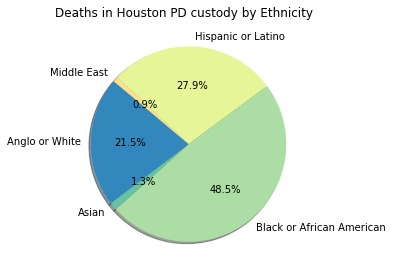

In [25]:
# Pie graph of Ethnicity of Death in Houston PD custody
labels = hpd['ethnicity']
sizes = hpd['value']
#explode = (0.1, 0, 0, 0)  # explode 1st slice
 
# Plot
plt.pie(sizes, explode= None, labels=labels, colors=Spectral8,
        autopct='%1.1f%%', shadow=True, startangle=140)
 
plt.axis('equal')
plt.suptitle('Deaths in Houston PD custody by Ethnicity')
plt.rcParams["figure.figsize"] = (10,19)
plt.show()

In [26]:
#Create df for Harris County
total= []
for r in majdept['Harris County Sheriff\'s Dept.']:
    total.append(r)
harris = pd.DataFrame()
harris['ethnicity'] = majdept.index
harris['value'] = total
harris = harris.dropna()

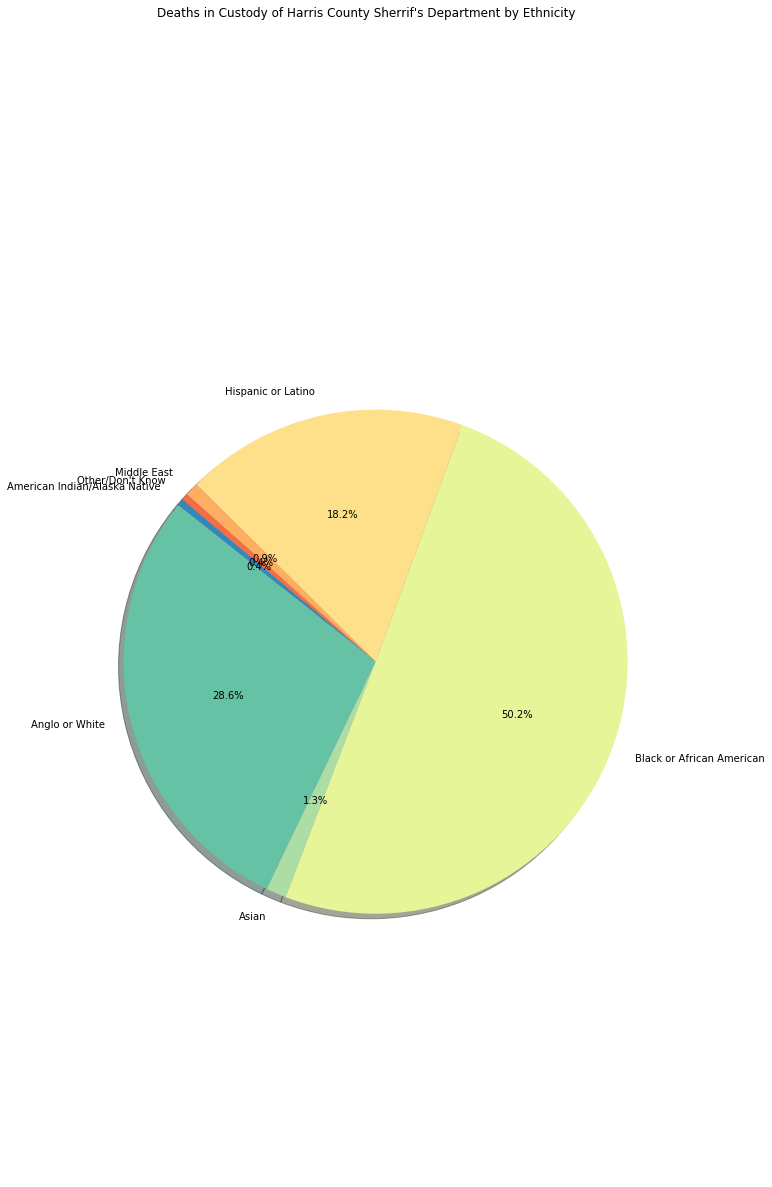

In [27]:
# Pie chart of Harris County Deaths by Ethnicity
labels = harris['ethnicity']
sizes = harris['value']
#explode = (0.1, 0, 0, 0)  # explode 1st slice
 
# Plot
plt.pie(sizes, explode= None, labels=labels, colors=Spectral8,
        autopct='%1.1f%%', shadow=True, startangle=140)
 
plt.axis('equal')
plt.suptitle('Deaths in Custody of Harris County Sherrif\'s Department by Ethnicity')
plt.rcParams["figure.figsize"] = (10,1)
plt.show()

In [28]:
#Create df for San Antonio Police Dept.
total= []
for r in majdept['San Antonio Police Dept.']:
    total.append(r)
sa = pd.DataFrame()
sa['ethnicity'] = majdept.index
sa['value'] = total
sa = sa.dropna()

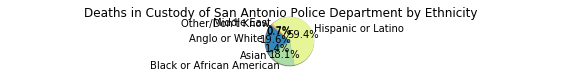

In [29]:
# Pie chart of San Antonio Police Dept. Deaths by Ethnicity
labels = sa['ethnicity']
sizes = sa['value']
#explode = (0.1, 0, 0, 0)  # explode 1st slice
 
# Plot
plt.pie(sizes, explode= None, labels=labels, colors=Spectral8,
        autopct='%1.1f%%', shadow=True, startangle=140)
 
plt.axis('equal')
plt.suptitle('Deaths in Custody of San Antonio Police Department by Ethnicity')
plt.rcParams["figure.figsize"] = (20,12)
plt.show()

In [30]:
#Create df for Harris County
total= []
for r in majdept['Bexar County Sheriff\'s Dept.']:
    total.append(r)
bexar = pd.DataFrame()
bexar['ethnicity'] = majdept.index
bexar['value'] = total
bexar = bexar.dropna()

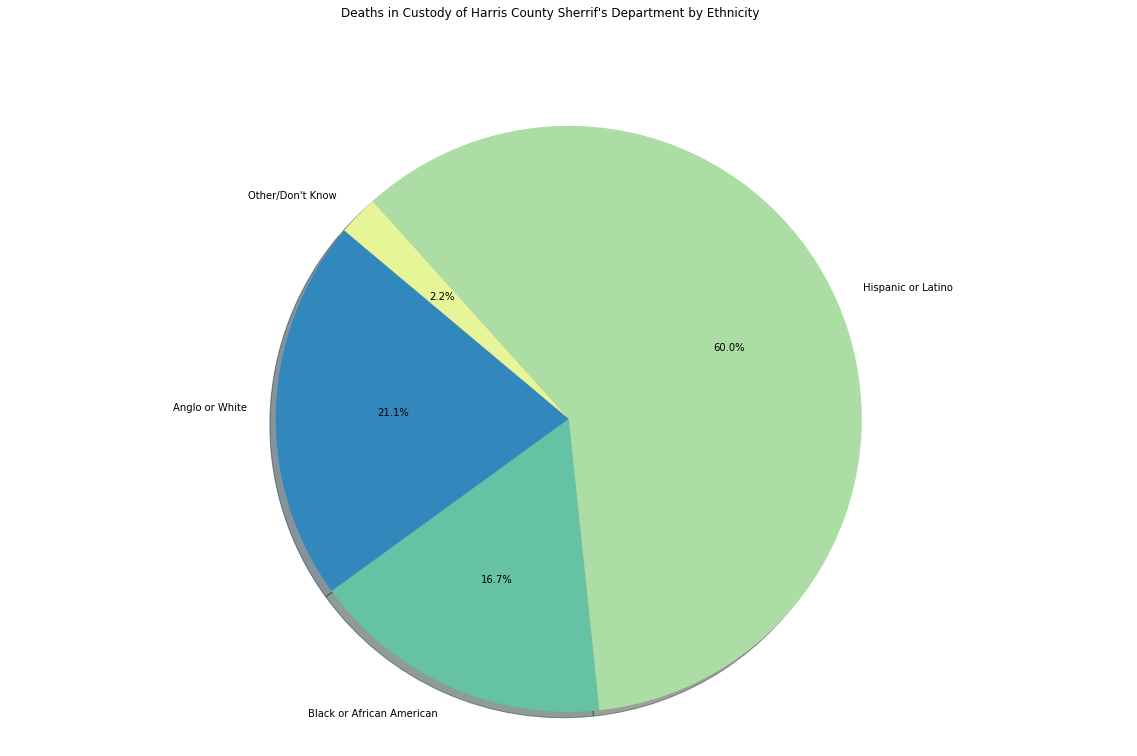

In [31]:
# Pie chart of Bexar County Deaths by Ethnicity
labels = bexar['ethnicity']
sizes = bexar['value']
#explode = (0.1, 0, 0, 0)  # explode 1st slice
 
# Plot
plt.pie(sizes, explode= None, labels=labels, colors=Spectral8,
        autopct='%1.1f%%', shadow=True, startangle=140)
 
plt.axis('equal')
plt.suptitle('Deaths in Custody of Harris County Sherrif\'s Department by Ethnicity')
plt.rcParams["figure.figsize"] = (10,1)
plt.show()

In [32]:
#create small df of deaths grouped by year and counts for each Manner of Death
line = cust.groupby('year')['Manner Death'].value_counts()
line =line.unstack().fillna(0).astype(int)
line

Manner Death,Accidental injury caused by others,Accidental injury to self,Alcohol/Drug Intoxication,Homicide by Law Enforcement/Correctional Staff,Homicide by Other,Natural Causes/Illness,Other,Suicide
year,,,,,,,,
2005,1,12,25,41,3,382,6,76
2006,0,10,36,46,11,483,4,67
2007,6,14,43,65,2,465,3,72
2008,4,15,24,66,6,498,11,58
2009,2,10,18,74,2,446,6,64
2010,0,14,15,65,7,399,12,76
2011,2,21,24,57,9,426,12,62
2012,1,17,22,97,13,449,15,76
2013,0,13,27,91,6,479,13,64


In [33]:
#line graph showing number of death in each year for each type of Manner of Death

x= list(line.index)

l = figure(title="Manner of Death by year", y_range=(0, 500), y_axis_label='Number of Deaths',x_axis_label='Year', plot_width=1000)

r0= l.line(x, line['Accidental injury caused by others'], line_color="tomato", line_dash="dotdash")

r1= l.line(x, line['Accidental injury to self'])
r2= l.circle(x, line['Accidental injury to self'])

r3= l.line(x, line['Alcohol/Drug Intoxication'],line_width=2, line_color="olivedrab") 

r4= l.line(x, line['Homicide by Law Enforcement/Correctional Staff'], line_dash="dotted", line_color="gold") 

r5= l.line(x, line['Homicide by Other'], line_dash="dashed", line_width=2, line_color="indigo") 

r6 = l.line(x, line['Natural Causes/Illness'], line_color="coral") 
r7 = l.square(x, line['Natural Causes/Illness'], fill_color=None, line_color="coral")

r8 = l.line(x, line['Other'], line_color="green") 
r9 = l.triangle(x, line['Other'], line_color= "green")

r10 = l.line(x, line['Suicide'], line_color="orange") 
r11 = l.cross(x, line['Suicide'], line_color = "orange")

legend = Legend(items=[
    ("Accidental injury caused by others", [r0]), 
    ("Accidental injury to self", [r1, r2]), 
    ("Alcohol/Drug Intoxication", [r3]), 
    ("Homicide by Law Enforcement/Correctional Staff", [r4]), 
    ("Homicide by Other", [r5]),("Natural Causes/Illness", [r6, r7]), 
    ("Other", [r8, r9]),
    ("Suicide", [r10, r11]),
], location=(0, -30))

l.add_layout(legend, 'right')

show(l)

In [34]:
shoot.head()

,Date,NumberOfSubjects,Fatal,SubjectArmed,Notes,SubjectRace,SubjectGender,SubjectAge,NatureOfStop,NumberOfShots,NumberOfOfficers,OfficerRace,OfficerGender,Department,FullNarrative,city,state
103,9/25/2010,1,F,Y,NaN,W,M,26,Domestic Disturbance,NaN,1,H,M,Austin PD,NaN,Austin,TX
104,10/1/2010,1,F,Y,NaN,L,M,16,Burglary / home invasion,NaN,1,W,M,Austin PD,NaN,Austin,TX
105,11/2/2010,1,F,Y,NaN,A,M,26,Shots fired / shooting,NaN,2,"W,W","M,M",Austin PD,NaN,Austin,TX
106,12/23/2010,1,F,N,"Fired, knife",W,M,35,Traffic stop,NaN,1,B,M,Austin PD,NaN,Austin,TX
107,5/9/2011,1,F,Y,NaN,L,M,30,Shots fired / shooting,NaN,1,H,M,Austin PD,NaN,Austin,TX


In [35]:
race = shoot.groupby('Department')['SubjectRace'].value_counts().unstack('Department')

In [36]:
race.rename({'A': 'Asian', 'B':'Black', 'L':'Latino', 'U':'Unknown', 'W':'White'}, inplace=True)
race

Department,Austin PD,Dallas Police Department,El Paso PD,El Paso Police Department,Fort Worth PD,Houston Police Department,San Antonio PD,San Antonio Police Department,San Antonio Police Dept
SubjectRace,,,,,,,,,
Asian,1.0,1.0,NaN,NaN,NaN,4.0,NaN,NaN,NaN
Black,11.0,58.0,NaN,1.0,15.0,163.0,14.0,1.0,1.0
Latino,8.0,38.0,3.0,1.0,6.0,81.0,26.0,10.0,NaN
Unknown,NaN,NaN,1.0,NaN,2.0,30.0,14.0,NaN,NaN
White,26.0,22.0,14.0,1.0,23.0,34.0,24.0,NaN,2.0


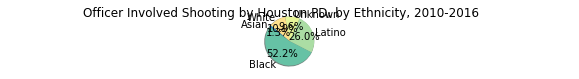

In [37]:
# Pie chart of Bexar County Deaths by Ethnicity
labels = race.index
sizes = race['Houston Police Department']
#explode = (0.1, 0, 0, 0)  # explode 1st slice
 
# Plot
plt.pie(sizes, explode= None, labels=labels, colors=Spectral8,
        autopct='%1.1f%%', shadow=True, startangle=140)
 
plt.axis('equal')
plt.suptitle('Officer Involved Shooting by Houston PD, by Ethnicity, 2010-2016')
plt.rcParams["figure.figsize"] = (20,10)
plt.show()

In [38]:
shoot.SubjectRace.isnull().sum()

4

In [39]:
shoot.SubjectGender.isnull().sum()

147

In [40]:
gender = shoot[shoot.SubjectGender.isnull()]
gender.NumberOfSubjects.value_counts()

1    147
Name: NumberOfSubjects, dtype: int64

In [41]:
fatal = shoot[shoot.Fatal == 'F']
non = shoot[shoot.Fatal == 'N']

In [42]:
frace= fatal.SubjectRace.value_counts()
frace.rename({'A': 'Asian', 'B':'Black', 'L':'Latino', 'U':'Unknown', 'W':'White'}, inplace=True)

In [43]:
nrace= non.SubjectRace.value_counts()
nrace.rename({'A': 'Asian', 'B':'Black', 'L':'Latino', 'U':'Unknown', 'W':'White'}, inplace=True)

Text(0.5,1,'Non-fatal Shootings by Ethnicity')

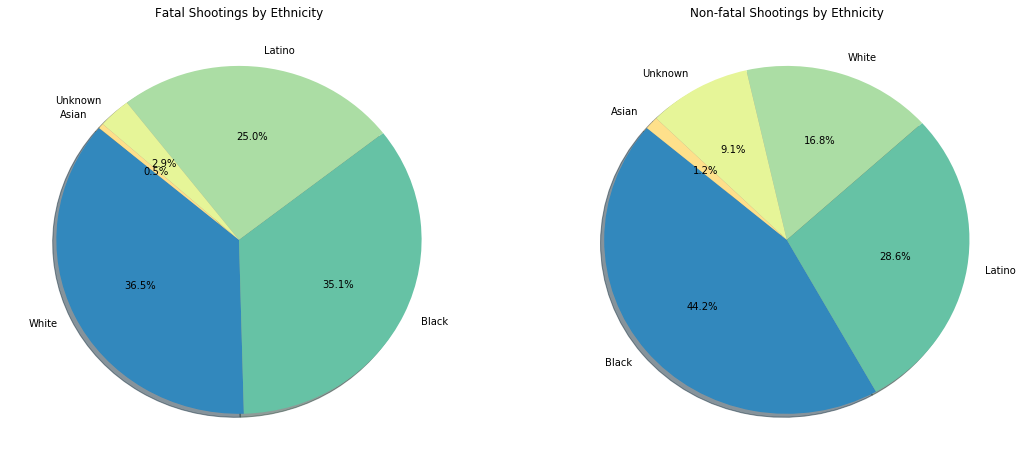

In [44]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize = (18,8))

flabels = frace.index
fsizes = frace
nlabels = nrace.index
nsizes = nrace

ax1.pie(fsizes, explode= None, labels=flabels, colors=Spectral8,
        autopct='%1.1f%%', shadow=True, startangle=140)
#plt.axis('equal')
ax1.set_title('Fatal Shootings by Ethnicity')
#plt.rcParams["figure.figsize"] = (20,20)

ax2.pie(nsizes, explode= None, labels=nlabels, colors=Spectral8,
        autopct='%1.1f%%', shadow=True, startangle=140)
#plt.axis('equal')
ax2.set_title('Non-fatal Shootings by Ethnicity')
#plt.rcParams["figure.figsize"] = (20,20)


In [45]:
shoot.head()

,Date,NumberOfSubjects,Fatal,SubjectArmed,Notes,SubjectRace,SubjectGender,SubjectAge,NatureOfStop,NumberOfShots,NumberOfOfficers,OfficerRace,OfficerGender,Department,FullNarrative,city,state
103,9/25/2010,1,F,Y,NaN,W,M,26,Domestic Disturbance,NaN,1,H,M,Austin PD,NaN,Austin,TX
104,10/1/2010,1,F,Y,NaN,L,M,16,Burglary / home invasion,NaN,1,W,M,Austin PD,NaN,Austin,TX
105,11/2/2010,1,F,Y,NaN,A,M,26,Shots fired / shooting,NaN,2,"W,W","M,M",Austin PD,NaN,Austin,TX
106,12/23/2010,1,F,N,"Fired, knife",W,M,35,Traffic stop,NaN,1,B,M,Austin PD,NaN,Austin,TX
107,5/9/2011,1,F,Y,NaN,L,M,30,Shots fired / shooting,NaN,1,H,M,Austin PD,NaN,Austin,TX


In [46]:
armed = shoot[shoot.SubjectArmed == 'Y']
notarmed= shoot[shoot.SubjectArmed == 'N']

In [47]:
armed.Fatal.value_counts()

N    193
F    123
U      7
Name: Fatal, dtype: int64

In [48]:
notarmed.Fatal.value_counts()

N    218
F     83
U      3
Name: Fatal, dtype: int64

In [49]:
shoot.Fatal.value_counts()

N    420
F    208
U     12
Name: Fatal, dtype: int64

In [50]:
armfatal = armed.groupby('SubjectRace')['Fatal'].value_counts().unstack()
armfatal.rename({'A': 'Asian', 'B':'Black', 'L':'Latino', 'U':'Unknown', 'W':'White'}, inplace=True)
armfatal

Fatal,F,N,U
SubjectRace,,,
Asian,1.0,5.0,NaN
Black,41.0,92.0,5.0
Latino,33.0,54.0,1.0
Unknown,3.0,9.0,1.0
White,45.0,32.0,NaN


In [51]:
notarmfatal = notarmed.groupby('SubjectRace')['Fatal'].value_counts().unstack()
notarmfatal.rename({'A': 'Asian', 'B':'Black', 'L':'Latino', 'U':'Unknown', 'W':'White'}, inplace=True)

Text(0.5,1,'Non-fatal Shootings of Armed Subjects')

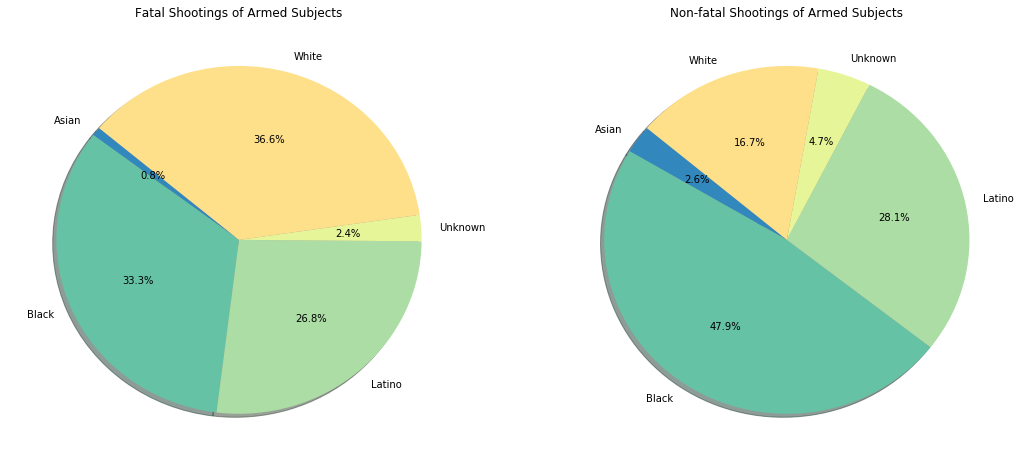

In [52]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize = (18,8))

alabels = armfatal.index
asizes = armfatal.F
ntlabels = armfatal.index
ntsizes = armfatal.N

ax1.pie(asizes, explode= None, labels=alabels, colors=Spectral8,
        autopct='%1.1f%%', shadow=True, startangle=140)
ax1.set_title('Fatal Shootings of Armed Subjects')

ax2.pie(ntsizes, explode= None, labels=ntlabels, colors=Spectral8,
        autopct='%1.1f%%', shadow=True, startangle=140)
ax2.set_title('Non-fatal Shootings of Armed Subjects')

Text(0.5,1,'Non-fatal Shootings of Unarmed Subjects')

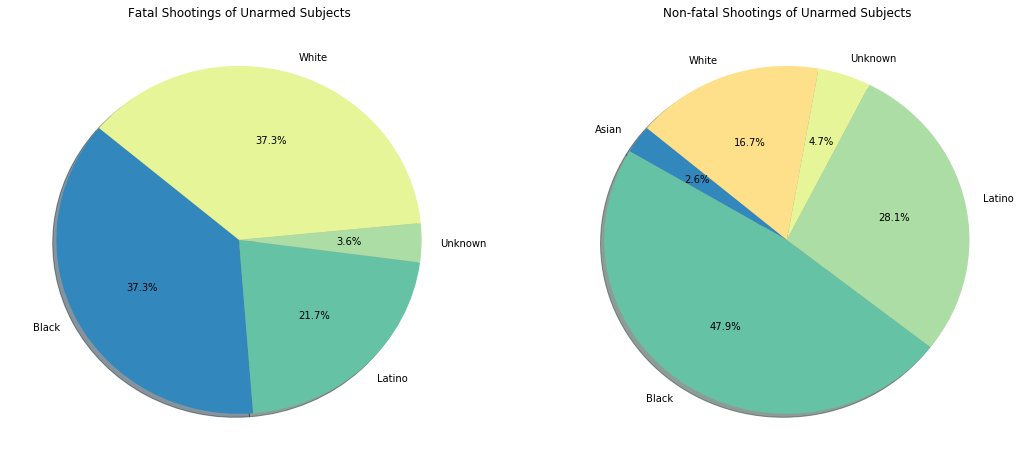

In [53]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize = (18,8))

nflabels = notarmfatal.index
nfsizes = notarmfatal.F
nntsizes = notarmfatal.N

ax1.pie(nfsizes, explode= None, labels=nflabels, colors=Spectral8,
        autopct='%1.1f%%', shadow=True, startangle=140)
ax1.set_title('Fatal Shootings of Unarmed Subjects')

ax2.pie(ntsizes, explode= None, labels=ntlabels, colors=Spectral8,
        autopct='%1.1f%%', shadow=True, startangle=140)
ax2.set_title('Non-fatal Shootings of Unarmed Subjects')

In [56]:
armfat = shoot.groupby('SubjectArmed')['Fatal'].value_counts().unstack()

In [57]:
armfat.rename({'N': 'Not Armed', 'U':'Unknown', 'Y':'Armed'}, inplace=True)

In [60]:
armfat.rename(columns ={'F': 'Fatal', 'U':'Unknown', 'N':'Not Fatal'}, inplace=True)

In [62]:
armfat

Fatal,Fatal,Not Fatal,Unknown
SubjectArmed,,,
Not Armed,83,218,3
Unknown,2,9,2
Armed,123,193,7


In [68]:
fatality = armfat.columns
fatality

Index(['Fatal', 'Not Fatal', 'Unknown'], dtype='object', name='Fatal')

In [78]:
#stacked horizontal bar graph showing Officer involved shootings Fatality vs Subject Armed
data= {'Subject Armed': list(armfat.index), 'Fatal' : armfat['Fatal'].values, 
       'Not Fatal': armfat['Not Fatal'].values,  'Unknown':armfat['Unknown'].values}

source = ColumnDataSource(data=data)

s = figure(y_range= data['Subject Armed'], plot_height=300,plot_width=900, title="Officer Involved Shooting by Fatality and Armed Subject",x_axis_label='Number of Incidents',
           toolbar_location=None, tools="")


s.hbar_stack(fatality, y= 'Subject Armed', height=0.5, color=Spectral3, source=source,
             legend=[value(x) for x in fatality])

s.x_range.start = 0
s.x_range.end = 500
s.y_range.range_padding = 0.1
s.xgrid.grid_line_color = None
s.axis.minor_tick_line_color = None
s.outline_line_color = None
s.legend.location = "top_right"
s.legend.orientation = "vertical"

show(s)


In [104]:
unarmed = shoot[shoot.SubjectArmed == 'N']
racedict ={'A': 'Asian', 'B':'Black', 'L':'Latino', 'U':'Unknown', 'W':'White'} 
unarmed = unarmed.replace({"SubjectRace": racedict})

In [107]:
armed = shoot[shoot.SubjectArmed == 'Y']
armed = armed.replace({"SubjectRace": racedict})

Text(0,0.5,'Number of Incidents')

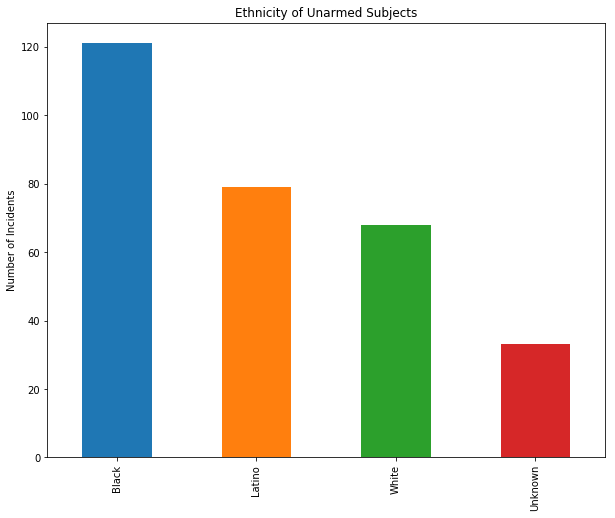

In [114]:
#bar graph of Race of Unarmed subjects
unarmed.SubjectRace.value_counts().plot(kind ='bar',figsize=(10,8), title = 'Ethnicity of Unarmed Subjects')
plt.ylabel('Number of Incidents')

Text(0,0.5,'Number of Incidents')

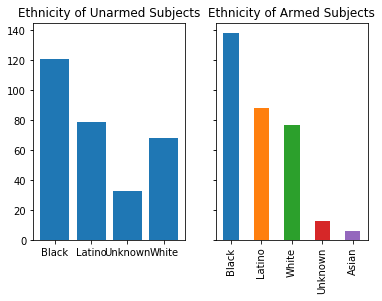

In [123]:
#bar graph of Race of Armed vs Unarmed subjects 
x =['Black', 'Latino', 'White', 'Unknown']
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)

ax2 = armed.SubjectRace.value_counts().plot(kind ='bar')


ax1.bar(x, unarmed.SubjectRace.value_counts())
ax1.set_title('Ethnicity of Unarmed Subjects')
#ax2.bar(x, armed.SubjectRace.value_counts())
ax2.set_title('Ethnicity of Armed Subjects')


plt.ylabel('Number of Incidents')